In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Cluster_data/Statistical_Study/FGM/FGM_DC/C2_CP_FGM_SPIN__20070420_202949_20070420_215903_V140305.cdf')

In [3]:
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 time_tags__C2_CP_FGM_SPIN CDF_EPOCH [1276]
1 half_interval__C2_CP_FGM_SPIN CDF_FLOAT [1276]
2 B_vec_xyz_gse__C2_CP_FGM_SPIN CDF_FLOAT [1276, 3]
3 B_mag__C2_CP_FGM_SPIN CDF_FLOAT [1276]
4 sc_pos_xyz_gse__C2_CP_FGM_SPIN CDF_FLOAT [1276, 3]
5 range__C2_CP_FGM_SPIN CDF_INT4 [1276]
6 tm__C2_CP_FGM_SPIN CDF_INT4 [1276]
7 B_vec_xyz_gse__C2_CP_FGM_SPIN_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
8 B_vec_xyz_gse__C2_CP_FGM_SPIN_LABEL_1 CDF_CHAR*2 [3] NRV
9 sc_pos_xyz_gse__C2_CP_FGM_SPIN_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
10 sc_pos_xyz_gse__C2_CP_FGM_SPIN_LABEL_1 CDF_CHAR*1 [3] NRV


In [4]:
epoch = cdf[0][...]
vector = cdf[2][...]
position = cdf[4][...]

In [5]:
epsilon = 1.029
Bz = -0.35
Dp = 2.48
beta = 2.08
Mms = 6.96
a1 = 11.1266
a3 = -0.0005
a4 = 2.5966
a5 = 0.8182
a6 = -0.017
a7 = -0.0122
a8 = 1.3007
a9 = -0.0049
a10 = -0.0328
a11 = 6.047
a14 = -0.002
a12 = 1.029
Re = 6371
BS = 4*Re #to ensure we are not magnetically connected to the bow shock 

alpha = a5*(1+a6*Bz)*(1+a7*Dp)*(1+a10*np.log(1+beta))*(1+a14*Mms)
r0 = a1*(1+a3*Bz)*(1+a9*beta)*(1+a4*(((a8-1)*(Mms**2) + 2)/((a8+1)*(Mms**2))))*Dp**(-1/a11)
r0 = r0*Re
print(alpha, r0/Re)

0.7580145569010709 13.137494179562479


2007-04-20 20:49:35.798000


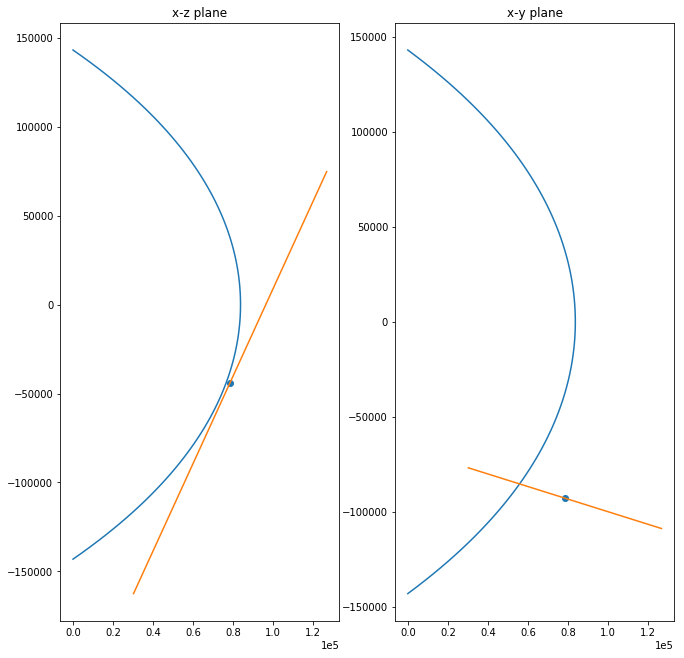

In [8]:
t = 283

theta = np.linspace(-np.pi/2,np.pi/2,100)
r = r0*(((1+epsilon)/(1+epsilon*np.cos(theta))))**alpha
x = r*np.cos(theta)
z = r*np.sin(theta)

xm_max = position[t,0]+vector[t,0]*6*Re
ym_max = position[t,1]+vector[t,1]*6*Re
zm_max = position[t,2]+vector[t,2]*6*Re
xm_min = position[t,0]-vector[t,0]*6*Re
ym_min = position[t,1]-vector[t,1]*6*Re
zm_min = position[t,2]-vector[t,2]*6*Re
xm = np.linspace(xm_min,xm_max,200)
ym = np.linspace(ym_min,ym_max,200)
zm = np.linspace(zm_min,zm_max,200)

%matplotlib inline

plt.figure(figsize=(11,11))
plt.subplot(1,2,1)
plt.plot(x,z)
plt.scatter(position[t,0],position[t,2])
plt.plot(xm,zm)
plt.title('x-z plane')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

y = r*np.sin(theta)

plt.subplot(1,2,2)
plt.plot(x,y)
plt.scatter(position[t,0],position[t,1])
plt.plot(xm,ym)
plt.title('x-y plane')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print(epoch[t])

2007-04-20 20:49:35.798000


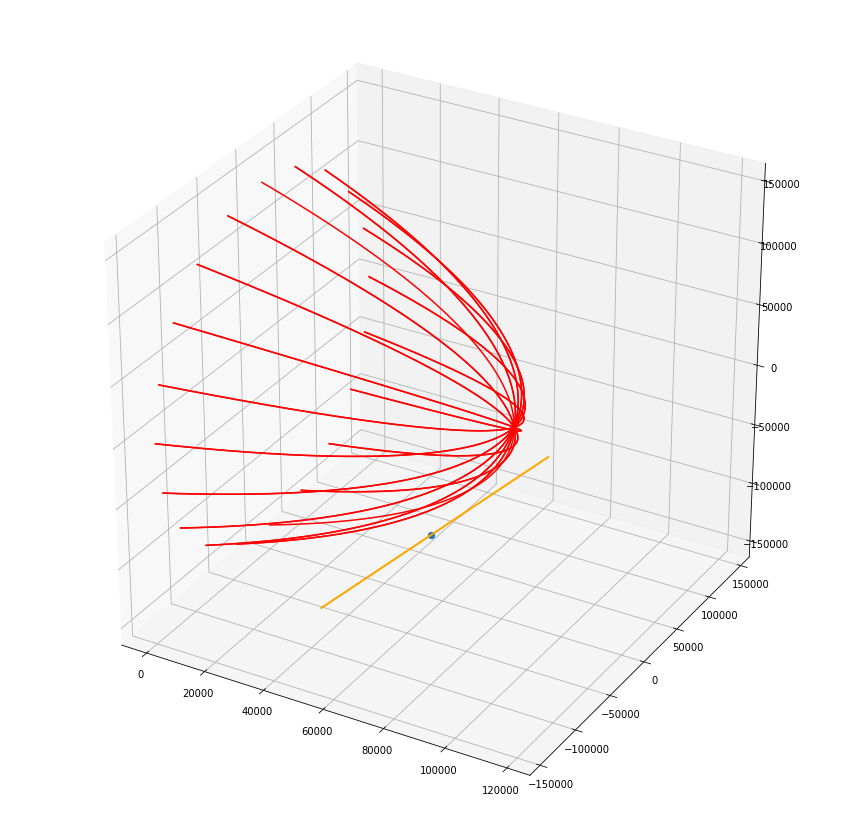

In [16]:
theta = np.linspace(-np.pi/2,np.pi/2,100)
r = r0*(((1+epsilon)/(1+epsilon*np.cos(theta))))**alpha

xm_max = position[t,0]+vector[t,0]*5*Re
ym_max = position[t,1]+vector[t,1]*5*Re
zm_max = position[t,2]+vector[t,2]*5*Re
xm_min = position[t,0]-vector[t,0]*5*Re
ym_min = position[t,1]-vector[t,1]*5*Re
zm_min = position[t,2]-vector[t,2]*5*Re
xm = np.linspace(xm_min,xm_max,200)
ym = np.linspace(ym_min,ym_max,200)
zm = np.linspace(zm_min,zm_max,200)

#%matplotlib qt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xm,ym,zm,'orange',linewidth=2.0)
ax.scatter(position[t,0],position[t,1],position[t,2],s=40)
for i in range(1,20):
    phi = (i/20)*2*np.pi
    x = r*np.cos(theta)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.sin(theta)*np.cos(phi)
    ax.plot(x,y,z,'r')
    #ax.axis('scaled')
    
print(epoch[t])

In [13]:
disconnected = []
disconnected_times = []
for t in range(len(epoch)):
    
    xm_max = position[t,0]+vector[t,0]*1*Re
    ym_max = position[t,1]+vector[t,1]*1*Re
    zm_max = position[t,2]+vector[t,2]*1*Re
    xm_min = position[t,0]-vector[t,0]*1*Re
    ym_min = position[t,1]-vector[t,1]*1*Re
    zm_min = position[t,2]-vector[t,2]*1*Re
    xm = np.linspace(xm_min,xm_max,1400)
    ym = np.linspace(ym_min,ym_max,1400)
    zm = np.linspace(zm_min,zm_max,1400)
    
    d = np.sqrt(xm**2+ym**2+zm**2)
    d_min = np.argmin(d)

    theta_t = np.arcsin((np.sqrt(ym[d_min]**2 + zm[d_min]**2))/(np.sqrt(xm[d_min]**2 + ym[d_min]**2 + zm[d_min]**2)))
    r_t = r0*(((1+epsilon)/(1+epsilon*np.cos(theta_t))))**alpha
    
    if np.min(d) < r_t:
        dc = 0
    else:
        dc = 1
        disconnected_times.append(epoch[t])
        
    disconnected.append(dc)
    
Counter(disconnected)

Counter({0: 10454, 1: 1})